# Cleaning and trimming of fastq files


<div class="alert alert-block alert-warning">**Please check:** Is `secapr_env` activated? You can test with `conda info --envs`. Activate the correct environment with `source activate secapr_env`</div>

<div class="alert alert-block alert-info">All data operations in this tutorial are executed from within the jupyter notebooks that were used to generate this documentation. All jupyter notebooks are stored in the folder `docs/notebook` of the `secapr` GitHub project. That means that **all file- and script-paths are in relation to the notebook directory** (`docs/notebook`). When following the tutorial you may have to adjust the paths, either using absolute paths or paths relative to your working directory.</div>


### 1. Unzip and rename your files
Before starting to process your fastq files with the `secapr` pipeline **unzip all of your fastq files** and make sure they are named properly (the file names coming from the sequencing faciilities are often very long and difficult to work with). A **simple numerical ID is enough followed by `_R1` for the forward reads and `_R2` for the backward reads**. All fastq files should be in the same directory as in this example:

In [2]:
%%bash
# example of the input file structure and naming: a plain folder with unzipped backward and forward fastq files
ls ../../data/raw/fastq/ | head -n 20

1061_R1.fastq
1061_R2.fastq
1063_R1.fastq
1063_R2.fastq
1064_R1.fastq
1064_R2.fastq
1065_R1.fastq
1065_R2.fastq
1068_R1.fastq
1068_R2.fastq
1070_R1.fastq
1070_R2.fastq
1073_R1.fastq
1073_R2.fastq
1074_R1.fastq
1074_R2.fastq
1079_R1.fastq
1079_R2.fastq
1080_R1.fastq
1080_R2.fastq


### 2. Quality-check your raw (and dirty) reads
To convince yourself that the raw reads are not fit for further processing, it is a good idea to first run some quality tests on the raw fastq files. To generate a quality overview over all samples you can use the `secapr quality_check` function:

`secapr quality_check --input ../../data/raw/fastq/ --output ../../data/processed/fastqc_results/raw`

Fastqc results of uncleaned fastq-files:


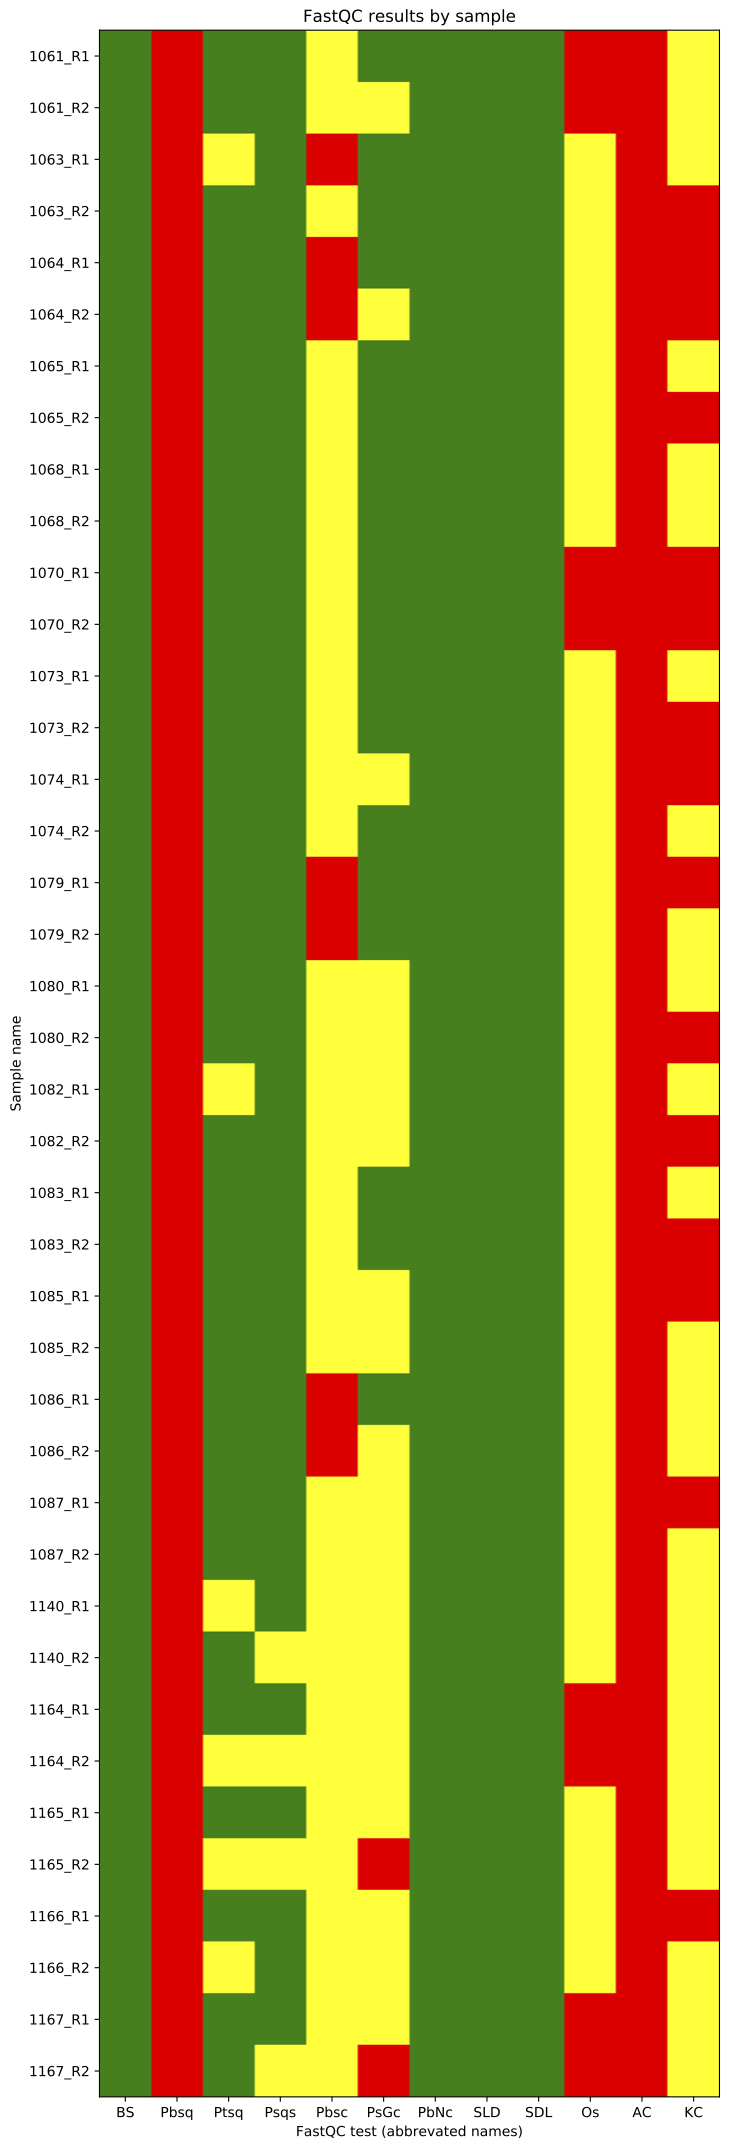

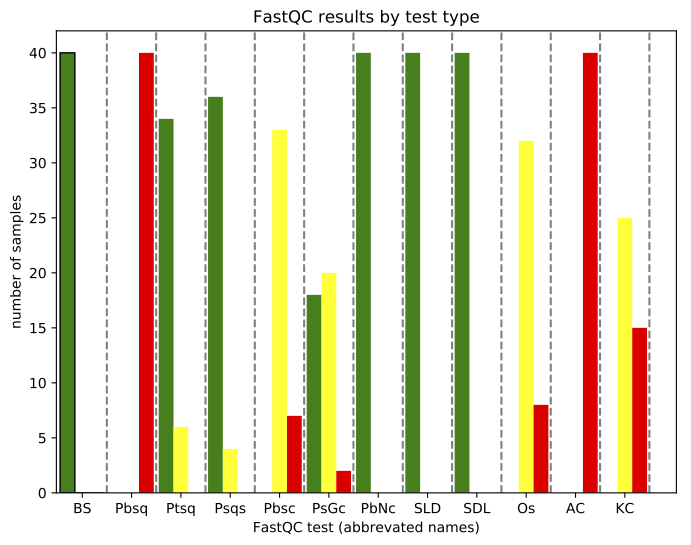

In [11]:
from IPython.display import Image, display
img1 = Image("../../data/processed/fastqc_results/raw/quality_summary_all_samples_1.png",height=400,width=200)
img2 = Image("../../data/processed/fastqc_results/raw/quality_summary_all_samples_2.png",height=100,width=400)
print("Fastqc results of uncleaned fastq-files:")
display(img1)
display(img2)

The two plots produced by the R-script show summary statistics for each individual test (tests shown on x-axis). The test names carry 3-letter acronyms, and the corresponding full test-name can be found by opening one of the html files. The first plot shows how many occurrences of each test-result (fail,pass,warn) were found for each test among all samples (per-test basis). The second plot shows for each sample (y-axis) which test had which result (per-sample basis). Eventually we want to get rid of all the red in these plots (see below).

### 3. Clean reads with `secapr` (default settings)
As we see above, the raw reads that you recevied from the sequencing facility are usually not fit for further processing, since all files fail several quality tests (red fields). One of the main issues with raw read files is that they contain **low quality reads**. Another issue is that most if not all reads will probably contain parts of the **Illumina adapter sequences**, which are attached on both ends of the read. In order to prepare the reads for further steps, we need to make sure that we properly filter out low-quality reads and that we clip off all remaining adapter contaminations. We can use the **`secapr clean_reads`** function to do exactly that for all of our files. This function applies the cleaning and trimming software *Trimmomatic* (Bolger et al. 2014).

<div class="alert alert-block alert-warning">**Please check:** Is `secapr_env` activated? You can test with `conda info --envs`. Activate the correct environment with `source activate secapr_env`</div>

Here is an overview of all available settings for `secapr clean_reads`:

In [12]:
%%bash
source activate secapr_env
secapr clean_reads -h

usage: secapr clean_reads [-h] --input INPUT --config CONFIG --output OUTPUT
                          [--read_min READ_MIN] [--index {single,double}]
                          [--seedMismatches SEEDMISMATCHES]
                          [--palindromeClipThreshold PALINDROMECLIPTHRESHOLD]
                          [--simpleClipThreshold SIMPLECLIPTHRESHOLD]
                          [--windowSize WINDOWSIZE]
                          [--requiredQuality REQUIREDQUALITY]
                          [--leadingQuality LEADINGQUALITY]
                          [--trailingQuality TRAILINGQUALITY]
                          [--cropToLength CROPTOLENGTH] [--headCrop HEADCROP]
                          [--minLength MINLENGTH] [--cores CORES]

Clean and trim raw Illumina read files

optional arguments:
  -h, --help            show this help message and exit
  --input INPUT         The directory containing the unzipped .fastq or .fq
                        files (raw read files)
  --config CONFIG    

#### a) Prepare config file
The script requires a config file which should contain the adapter and barcode information. You see an example of the config file below. The file consists of 3 sections:
- [adapters]

Here you provide the adapter sequences that were used during library preparation in the lab. Check which Illumina kit was used and find the corresponding sequences either in the Illumina manual or on their [webpage](https://support.illumina.com/content/dam/illumina-support/documents/documentation/chemistry_documentation/experiment-design/illumina-adapter-sequences_1000000002694-01.pdf). Add a * in the spot where the sample specific barcode will be inserted.
- [names]

Here you provide a unique string for each sample, as it occurs in the filename (this is how the program recognizes which files to process). You usually have two file for each sample (forward and backward reads). Make sure that this unique identifier occurs in both of those files. Add ':_' after each identifier (don't ask why).
- [barcodes]

Here you specify the sample specific barcode for each sample. First you state which adapter (i7 or i5) the barcode will be inserted in, followed by a dash (-) and the name of the sample, as stated in the section [names].


.

_Note: If you are working with double indexed adapters (both adapters containing barcodes), don't forget to add the * in the position where the barcode is inserted, also for the i5 adapter. In that case make sure in the [barcodes]-section to assign both barcodes for each sample to the correct adapter, e.g.:_

_i7-sampleID:AAACCC_

_i5-sampleID:AATTCC_

In [16]:
%%bash
cat ../../data/raw/adapter_info.txt

[adapters]
i7:GATCGGAAGAGCACACGTCTGAACTCCAGTCAC*ATCTCGTATGCCGTCTTCTGCTTG
i5:AATGATACGGCGACCACCGAGATCTACACTCTTTCCCTACACGACGCTCTTCCGATCT

[names]
1061:_
1063:_
1064:_
1065:_
1068:_
1070:_
1073:_
1074:_
1079:_
1080:_
1082:_
1083:_
1085:_
1086:_
1087:_
1140:_
1164:_
1165:_
1166:_
1167:_

[barcodes]
i7-1061:AGTCAA
i7-1063:ATGTCA
i7-1064:CCGTCC
i7-1065:GTAGAG
i7-1068:GTGGCC
i7-1070:CGTACG
i7-1073:ACTGAT
i7-1074:ATGAGC
i7-1079:CACGAT
i7-1080:CACTCA
i7-1082:CATGGC
i7-1083:CATTTT
i7-1085:CGGAAT
i7-1086:CTAGCT
i7-1087:CTATAC
i7-1140:TATAAT
i7-1164:GTGGCC
i7-1165:GTTTCG
i7-1166:CGTACG
i7-1167:GAGTGG


#### b) Run `secapr clean_reads` function
After preparing your config file in the previous step, you are ready to start with cleaning and trimming of your fastq files. For now let's just run the script with default settings. We will show below how to customize the settings of the script in order to achive the best cleaning results for your dataset.
Let's run the script as in this example command:
<div class="alert alert-block alert-warning">**Please check:** Is `secapr_env` activated? You can test with `conda info --envs`. Activate the correct environment with `source activate secapr_env`</div>

    secapr clean_reads --input ../../data/raw/fastq/ --config ../../data/raw/adapter_info.txt --output ../../data/processed/cleaned_trimmed_reads_default --index single
    
`secapr clean_reads` produces a subfolder for each sample in the output directory, containing the cleaned reads for the respective sample.

#### c) Check quality of the results
After cleaning the reads with `secapr clean_reads` with default settings we again perform the quality tests on all cleaned files, just as we did above for the raw reads. 

`secapr quality_check --input ../../data/processed/cleaned_trimmed_reads_default --output ../../data/processed/fastqc_results/cleaned_default_settings`

Fastqc results of fastq-files cleaned with default settings:


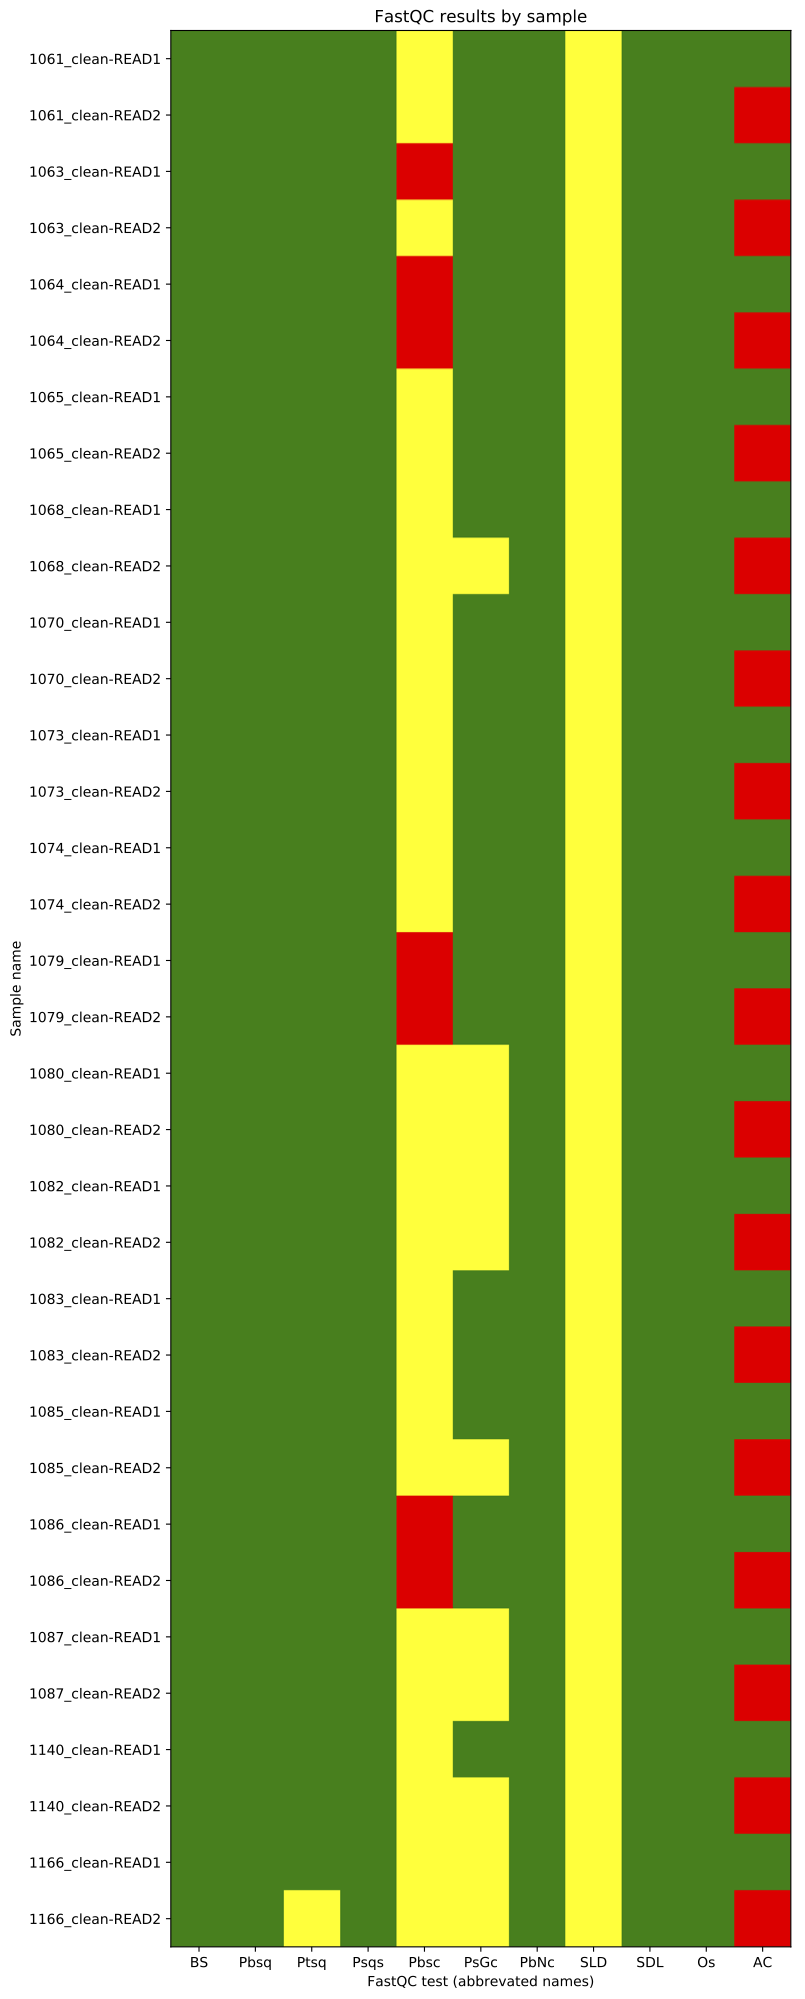

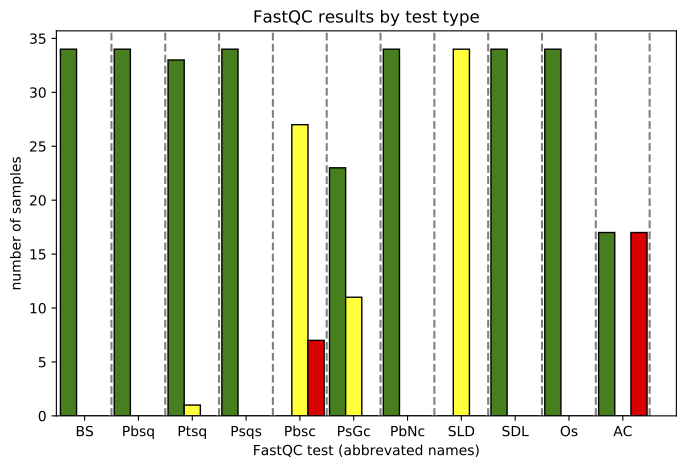

In [16]:
from IPython.display import Image, display
img1 = Image("../../data/processed/fastqc_results/cleaned_default_settings/quality_summary_all_samples_1.png",height=400,width=200)
img2 = Image("../../data/processed/fastqc_results/cleaned_default_settings/quality_summary_all_samples_2.png",height=100,width=400)
print("Fastqc results of fastq-files cleaned with default settings:")
display(img1,img2)


We ran `secapr clean_reads` with default settings and we see a clear improve in comparison to the quality test results of the raw reads (see plots further up in this document). However, there are still quite a few failed tests and I'm convinced we can do better than that. Check the `secapr clean_reads` documentation (by adding `-h` to the command) in order to see the available options and try some different settings in order to see if and how the results improve. It helps to check out in one of the html files what the different tests mean and try to find a settings in `secapr clean_reads` that could be taking care of the specific problem. Preferably all samples should pass all tests (there may still be some warnings) before you continue with further processing of the reads. Below we show an example of how the results can be further improved:

### 4. Fine-tune cleaning settings

As we see above, running the script with default settings improved the file quality but there is a lot of room for improvement. After reviewing the intial quality reports and after trying a bunch of different flags and values, I ended up with this command for the example data. See the script documentation for more information about the different flags (`secapr clean_reads -h`).

    secapr clean_reads --input ../../data/raw/fastq/ --config ../../data/raw/adapter_info.txt --output ../../data/processed/cleaned_trimmed_reads --index single --simpleClipThreshold 5 --palindromeClipThreshold 20 --seedMismatches 5 --headCrop 10

Let's check the final quality of the data:

    secapr quality_check --input ../../data/processed/cleaned_trimmed_reads --output ../../data/processed/fastqc_results/custom_settings

Fastqc results of fastq-files cleaned with default settings:


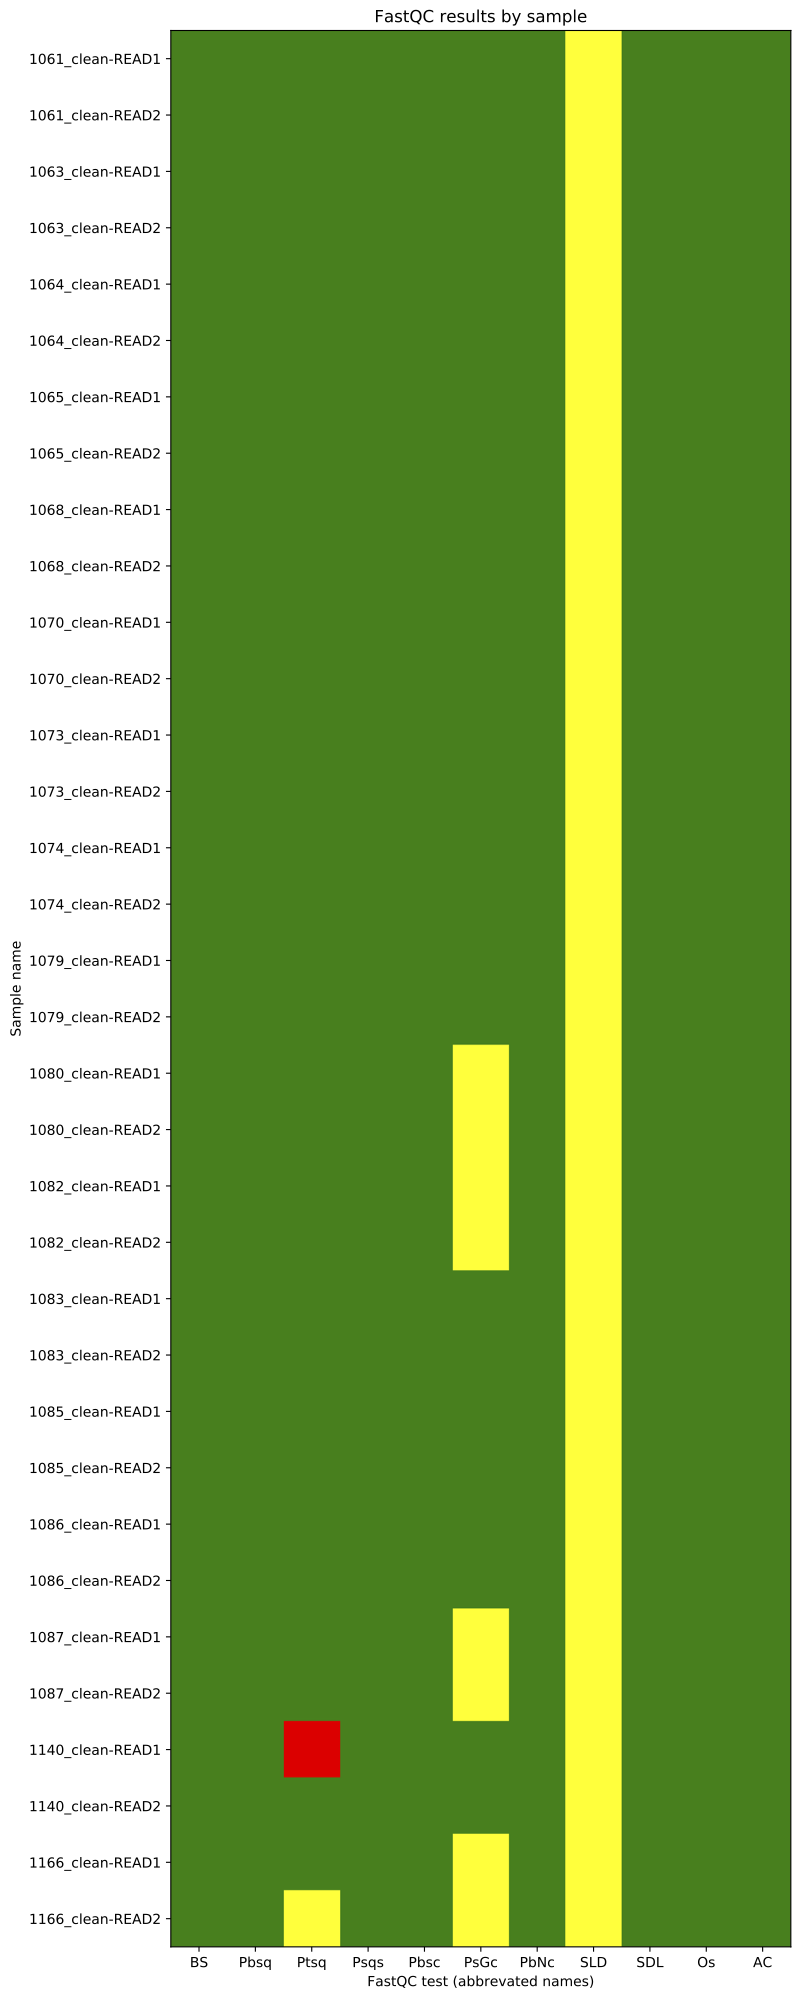

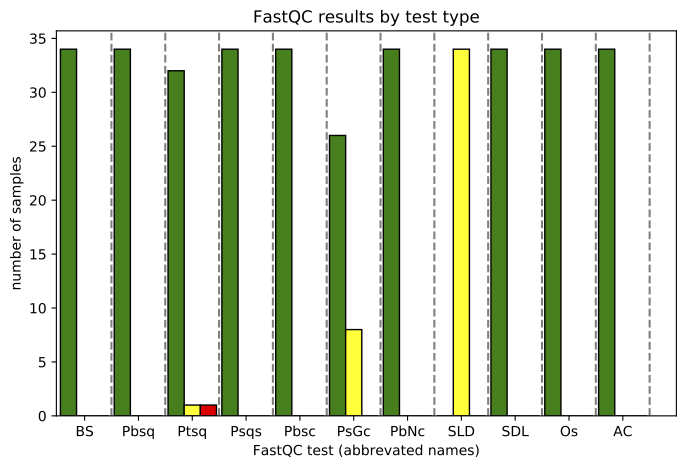

In [17]:
from IPython.display import Image, display
img1 = Image("../../data/processed/fastqc_results/custom_settings/quality_summary_all_samples_1.png",height=400,width=200)
img2 = Image("../../data/processed/fastqc_results/custom_settings/quality_summary_all_samples_2.png",height=100,width=400)
print("Fastqc results of fastq-files cleaned with default settings:")
display(img1,img2)

You can see how the overall quality of the data improves (compare R-plots to the ones resulting from the deafult settings). Once all samples are properly cleaned, move on to the next step, the [contig assembly](./contig_assembly.ipynb)

[Next page](contig_assembly.ipynb)